# **Ejercicio 1 ( minimización no restringida )**

**Objetivo:** Minimizar la función dada utilizando algoritmos genéticos con la librería DEAP.

## **Importar librerías necesarias**

Se importan las librerías necesarias para el ejercicio, incluyendo DEAP, NumPy y Matplotlib. En caso de que no estén instaladas, se pueden instalar utilizando pip.

In [1]:
# https://deap.readthedocs.io/en/master/
# Instalar paquete deap
# Instalar paquete deap
# Instalación de paquete faltante
# !pip install deap

In [ ]:
# Importar paquetes
import numpy as np
import random
import math
from deap import creator, tools, base, algorithms
from sklearn.metrics import mean_squared_error

# Visualización del espacio de búsqueda en 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## **Ejercicio 1:**

Ajustar una exponencial del tipo $ae^{bx}$ a un conjunto de puntos $(x_i, y_i)$ dados por la siguiente tabla.

| -1.0 | -0.7 | -0.4 | -0.1 | 0.2 | 0.5 | 0.8 | 1.0 |
|---|---|---|---|---|---|---|---|
| 36.547 | 17.264 | 8.155 | 3.852 | 1.820 | 0.860 | 0.406 | 0.246 |

## Función objetivo

Se declara la función objetivo, en este caso se busca realizar la minimización del error cuadrático medio (MSE) entre los valores predichos por la función exponencial y los valores reales de la tabla.

In [3]:
# Función objetivo
def objective_function(individual):  # a = individual[0], b = individual[1]
    x_true = [-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.0]
    y_true = [36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246]
    y_pred = []

    for x_prueba in x_true:
        Eval = individual[0]*np.exp(individual[1]*x_prueba)
        y_pred.append(Eval)

    mse = mean_squared_error(y_true, y_pred)
    return mse,

In [4]:
# Prueba de la función objetivo
objective_function([2.988, -2.492])

(0.027626279397227088,)

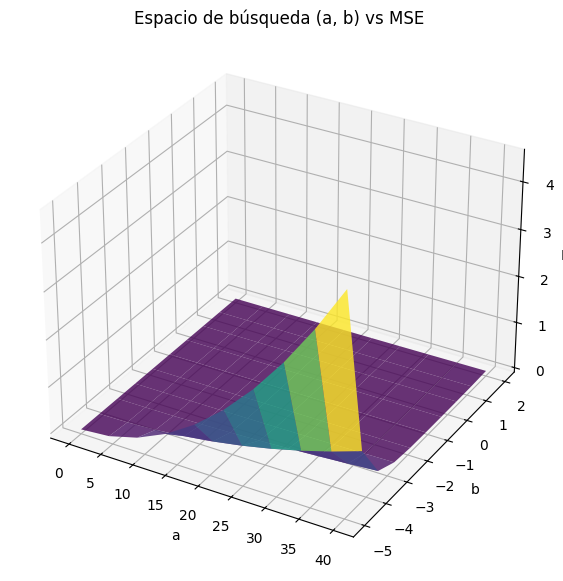

In [ ]:
# Rango de valores para a y b
a_vals = np.linspace(0, 40, 10)
b_vals = np.linspace(-5, 2, 10)
A, B = np.meshgrid(a_vals, b_vals)
Z = np.zeros_like(A)

# Calcular el MSE para cada combinación de a y b
x_true = [-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.0]
y_true = [36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246]

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        y_pred = [A[i, j] * np.exp(B[i, j] * x) for x in x_true]
        Z[i, j] = np.mean((np.array(y_true) - np.array(y_pred))**2)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('MSE')
ax.set_title('Espacio de búsqueda (a, b) vs MSE')
plt.show()

In [6]:
# Creamos los tipos de datos necesarios para DEAP
# Se define el tipo de fitness y el tipo de individuo
# Como es minimización: el peso debe ser negativo
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))  
creator.create('Individual', list, fitness=creator.FitnessMin)

In [7]:
# Crear la caja de herramientas
# Se define la caja de herramientas para almacenar las funciones de 
# inicialización, selección, cruce y mutación
toolbox = base.Toolbox()

# Generador de la variable de decisión
toolbox.register("attr_float", random.random)

# Inicializar individuo y población
# Un individuo es una lista de dos variables de decisión
# En este caso, son dos parámetros a y b de la función exponencial
# Cada individuo tendrá dos variables de decisión  
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, 2)  

# Población
# Una población es una lista de individuos
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [8]:
# Operadores
import sys

# Evaluate: registra la función objetivo.
toolbox.register('evaluate', objective_function)

# Operador de cruce (Crossover que simula el cruce binario)
# "eta" es un parámetro de distribución que controla la distribución de los hijos generados 
toolbox.register('mate', tools.cxSimulatedBinary, eta=0.5)

# Operador de mutación (Mutación gaussiana)
# "mu" es la media de la distribución normal, "sigma" es la desviación estándar
# "indpb" es la probabilidad de mutación de cada variable del individuo
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)

# Selección (Tournament Selection)
# "tournsize" es el tamaño del torneo, que determina cuántos individuos se seleccionan para competir
toolbox.register('select', tools.selTournament, tournsize=3)

In [9]:
# Configuración del algoritmo genético
# Número de generaciones, probabilidad de cruce y mutación

# Crea la población inicial
pop = toolbox.population(n=100)

# "hof" es un objeto HallOfFame que almacena los mejores individuos encontrados
hof = tools.HallOfFame(1) # mejor de todo el proceso

# "Stats" es un objeto que registra estadísticas sobre la población
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

## Optimización

In [10]:
# Este algoritmo reproduce el algoritmo evolutivo más simple
# Empieza el proceso evolutivo con la población inicial y aplica los operadores de 
# selección, cruce y mutación
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=100, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max    
0  	100   	209.651	3.20155	201.173	214.715
1  	62    	205.533	9.61047	141.201	223.077
2  	54    	199.475	16.0221	131.421	223.336
3  	54    	185.585	39.2386	8.89226	337.262
4  	60    	232.03 	468.252	12.9293	3555.62
5  	48    	1076.2 	8408.89	8.46727	84568.2
6  	59    	1085.42	7111.33	5.99003	60184.4
7  	45    	49.5758	45.3908	4.45537	369.233
8  	65    	28.4622	28.6575	4.45537	186.577
9  	56    	17.5352	44.2865	5.35956	444.341
10 	53    	27.0643	99.8675	5.13146	683.741
11 	51    	6.64762	3.07368	4.26708	29.154 
12 	57    	7.19489	7.61231	4.26708	53.9773
13 	55    	17.9335	82.9101	3.64256	796.635
14 	56    	9.32883	18.2165	3.64256	139.174
15 	56    	6.79491	17.1949	3.64256	177.482
16 	53    	13.0084	68.1963	3.49272	684.85 
17 	51    	10.3841	40.3095	3.49272	314.155
18 	62    	4.14755	1.13399	3.35634	12.7552
19 	61    	6.9633 	13.7145	3.07165	83.2838
20 	41    	3.52842	0.157702	3.03779	4.4451 
21 	64    	8.13702	22.737  	2.8765 	177.32 
22 	71   

In [11]:
# Mejor solución
print('Mejor individuo:', hof[0])

Mejor individuo: [1.938724545485977, -2.9664390107654492]


In [12]:
# Resultado de la función objetivo (FO) del mejor individuo:
print('Mejor F.O.:', objective_function(hof[0]))

Mejor F.O.: (1.2596978631764817,)


## Análisis gráfico

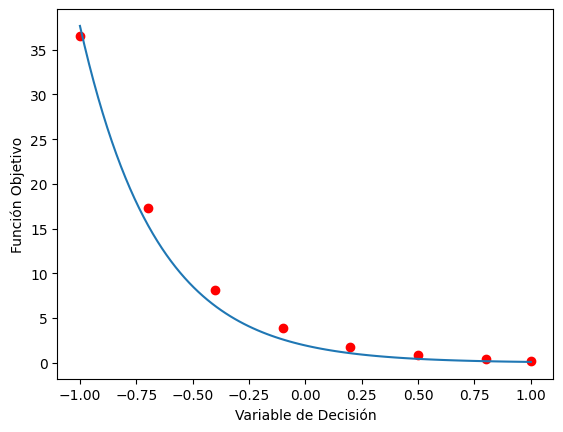

In [13]:
import matplotlib.pyplot as plt

x = [-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.0]
x_2 = np.linspace(-1,1,100)

# Y real
y = [36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246]

# Y predicho
y_p = []

for i in x_2:
    y_p.append(hof[0][0]*np.exp(hof[0][1]*i))

plt.scatter(x, y, color='red')
plt.plot(x_2, y_p)
plt.xlabel('Variable de Decisión')
plt.ylabel('Función Objetivo')
plt.show()